# Travaux pratiques : Séance 2
## Troisième partie

Importation des librairies et des modules nécessaires

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Importation du dataset et sauvegarde de la partie data/target

In [2]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target

Division des données en un ensemble d'entrainement et un ensemble de test

In [3]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1, random_state=21) 

Division des données en un ensemble d'entrainement et un ensemble de validation

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42) 

Boucle générant 29 arbres de décision (1 pour chaque valeur du paramètre max_leaf_nodes entre 2 et 30), calcul de l'accuracy sur l'ensemble d'entrainement et de test, et affichage des accuracy en fonction de la valeur de max_leaf_nodes

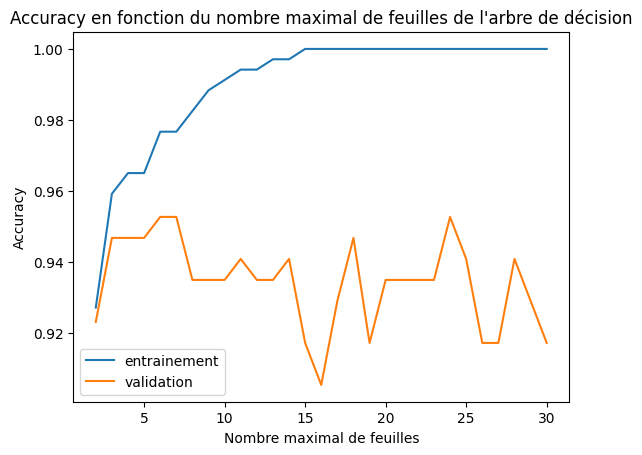

In [5]:
list_accuracy_train = []
list_accuracy_val = []

for i in range(2,31):
    clf =  DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(x_train,y_train)
    
    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    list_accuracy_train.append(accuracy_train)
    
    y_pred_val = clf.predict(x_val)
    accuracy_val = accuracy_score(y_pred_val,y_val)
    list_accuracy_val.append(accuracy_val)

plt.plot(range(2,31), list_accuracy_train, label = 'entrainement')
plt.plot(range(2,31),list_accuracy_val, label = 'validation')

plt.xlabel("Nombre maximal de feuilles")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du nombre maximal de feuilles de l'arbre de décision")
plt.legend()

plt.show()

Création du meilleur modèle

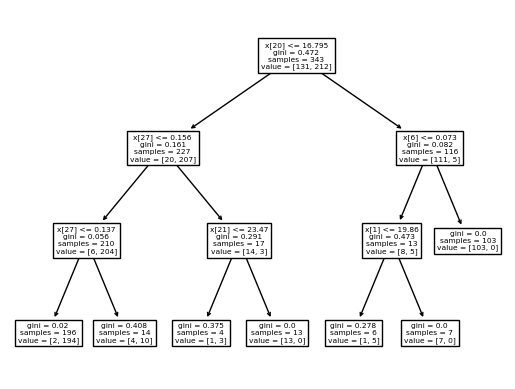

In [6]:
best_clf =  DecisionTreeClassifier(max_leaf_nodes=7)
best_clf.fit(x_train, y_train)
plot_tree(best_clf)
plt.show()

Calcul des métriques pour évaluer la performance du modèle

In [7]:
y_pred_test = best_clf.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_pred_test, y_test)
print("Précision : ", precision)
recall = recall_score(y_pred_test, y_test)
print("Recall : ", recall)
f1 = f1_score(y_pred_test, y_test)
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_test, y_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.9649122807017544
Précision :  1.0
Recall :  0.9534883720930233
F1-score :  0.9761904761904763
Matrice de confusion :
 [[0.24561404 0.        ]
 [0.03508772 0.71929825]]
